## Group No 160

## Group Member Names:
1. Suman Sarkar
2. Arvind Sriram G
3. Sunil Gowroji

In [1]:
#Diabetes Dataset -> "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"
!pip install -U -q PyDrive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, classification_report
%matplotlib inline

 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


#keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers


# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?

   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [35]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [36]:

link = 'https://drive.google.com/file/d/1uI8rHIUnuNLr6ekhfwy5xjRju7smhI5E/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('diabetes.csv') 
 
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [21]:

# load dataset -  if the dataset is not directly accessed
# diabetes_data_url = 'https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database'
# #diabetes_data = pd.read_csv(diabetes_data_url)
# diabetes_data = pd.read_csv('/content/diabetes.csv')

diabetes_data.shape

(768, 9)

## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [37]:
##---------Type the code below this line------------------##
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
print(diabetes_data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [39]:
#convert code to float datatype to make the attribute data for DL
diabetes_data = diabetes_data.astype('float64')
print(diabetes_data.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

1. There are 768 records.
2. The dataset contains the following attributes:
   Pregnancies,
   Glucose,
   BloodPressure,
   SkinThickness,
   Insulin,
   BMI,
   DiabetesPedigreeFunction,
   Age

   Target Variable:
   Outcome


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [40]:
##---------Type the code below this line------------------##
## Removing the null data if there is any
diabetes_data.isnull().values.any()

False

In [41]:
# Drop rows with missing values
diabetes_data.dropna(inplace=True)

# summarize the number of rows and columns in df
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


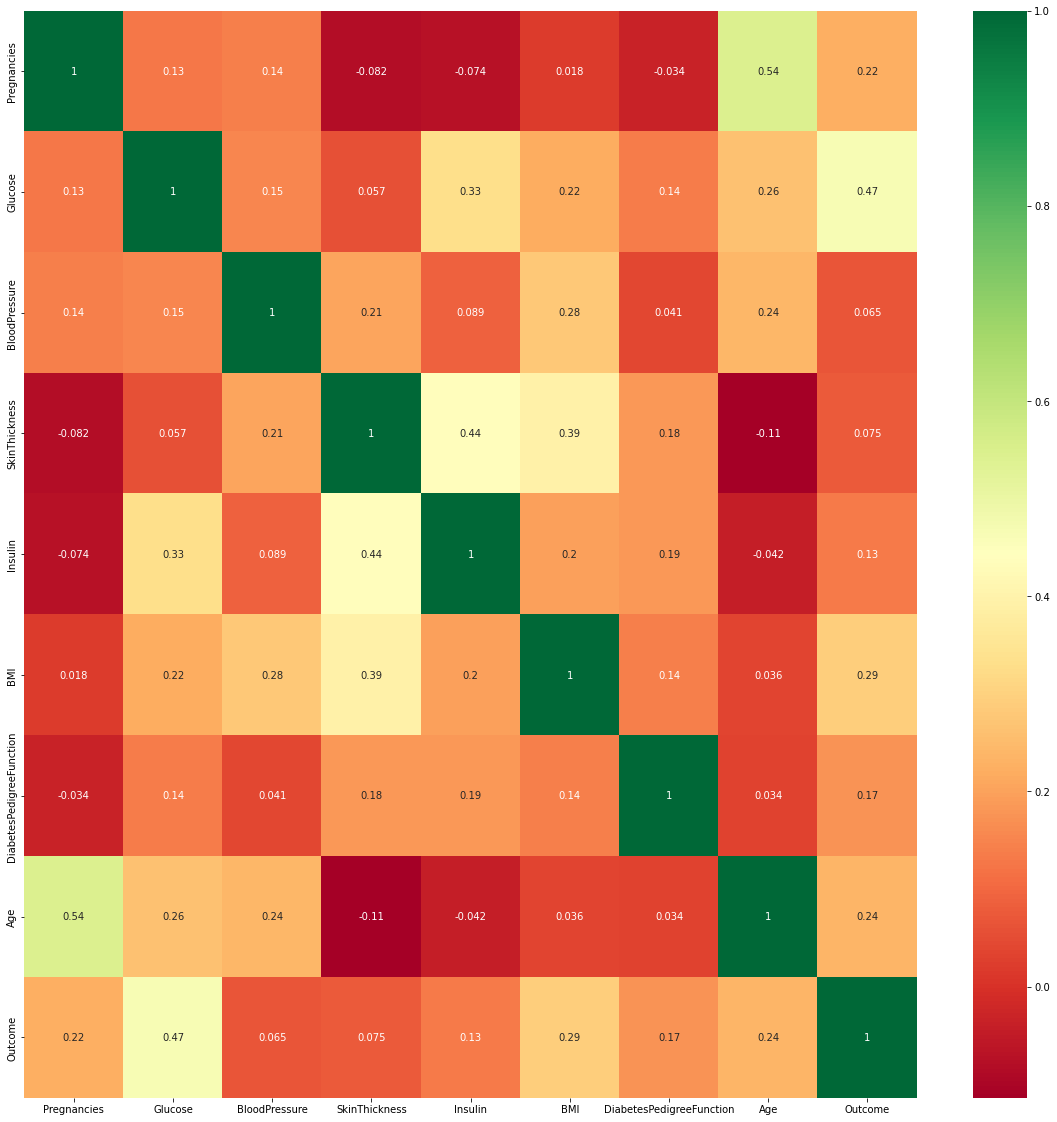

In [42]:
##---------Type the code below this line------------------##
corr_matrix = diabetes_data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(corr_matrix,annot=True,cmap="RdYlGn")

   Label  Count
0    0.0    500
1    1.0    268


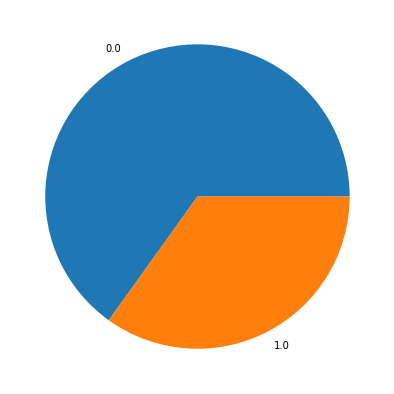

In [43]:
# Distribution of Data
y=diabetes_data["Outcome"]
label, count = np.unique(y, return_counts=True)
pie_matrix = pd.DataFrame()
pie_matrix['Label'] =label
pie_matrix['Count'] =count
print(pie_matrix)

#Creating the Plot
plt.figure(figsize = (10,7))
plt.pie(count, labels = label)

#Showing the Plot
plt.show()

## 3.2 Encode categorical data

In [44]:
##---------Type the code below this line------------------##
# Encoding not required as the Categorical field Output is already encoded.

## 3.3 Normalize the data

In [45]:
##---------Type the code below this line------------------##
for col in diabetes_data:
  scaling = MinMaxScaler()
  diabetes_data[col] = scaling.fit_transform(diabetes_data[[col]])


In [46]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


## 3.4 Feature Engineering 

if any

In [ ]:
##---------Type the code below this line------------------##

## 3.5 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



In [47]:
##---------Type the code below this line------------------##
X= diabetes_data.drop(columns= ['Outcome'])
y= diabetes_data["Outcome"]

## 3.6 Split the data into training set and testing set

In [48]:
##---------Type the code below this line------------------##
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

1. There are no duplicates present in the above dataset. 
2. No missing data or inconsistencies found. We have the code in place so that any record containing null value entries can be removed.
3. No encoding is required as the categorical field Outcome is already encoded.
4. We used MinMaxScaler for normalization technique to preserves the shape of the original distribution.
5. Training and Testing dataset ratio is 70:30
6. In addition, we performed pre-processing to check coorelations and distribution of taget categorical field.

##---------Type the answer below this line------------------##

# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [69]:
##---------Type the code below this line------------------##

network = models.Sequential()
network.add(layers.Dense(8, activation = 'relu',kernel_initializer='random_normal', input_shape=(8,)))
network.add(layers.Dense(4, activation = 'relu',kernel_initializer='random_normal' ))
network.add(layers.Dense(1, activation='sigmoid',kernel_initializer='random_normal'))

## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer 
* Activation function used in each hidden layer 
* Activation function used in the output layer
* Total number of trainable parameters

Score: 4 Marks

##---------Type the answer below this line------------------##


* Number of layers = 3
* Number of units in each layer 

  1. First layer = 8
  2. Second layer = 4
  3. Third layer =1

* Activation function used in each hidden layer = relu(first and second layer) and sigmoid(third layer)

  -> Here 'relu' helps to prevent the exponential growth in the computation required to operate the neural network.

* Activation function used in the output layer

  -> sigmoid function placed as the last layer of a machine learning model can serve to convert the model's output into a probability score, which can be easier to work with and interpret.

* Total number of trainable parameters = 113

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [70]:
##---------Type the code below this line------------------##
network.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
## network.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = False) , metrics = ['accuracy'] )
network.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


## 5.2 Train the model

In [71]:
##---------Type the code below this line------------------##
history = network.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32)


Epoch 1/150
17/17 [==============================] - 1s 12ms/step - loss: 0.6920 - accuracy: 0.6425 - val_loss: 0.6909 - val_accuracy: 0.6537
Epoch 2/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.6499 - val_loss: 0.6884 - val_accuracy: 0.6537
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.6499 - val_loss: 0.6852 - val_accuracy: 0.6537
Epoch 4/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.6499 - val_loss: 0.6821 - val_accuracy: 0.6537
Epoch 5/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6499 - val_loss: 0.6780 - val_accuracy: 0.6537
Epoch 6/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.6499 - val_loss: 0.6734 - val_accuracy: 0.6537
Epoch 7/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.6499 - val_loss: 0.6687 - val_accuracy: 0.6537
Epoch 8/150


Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

##---------Type the answers below this line------------------##

 Adam optimization uses estimations of the first and second moments of the gradient to adapt the learning rate for each weight of the neural network. It is used to update network weights iterative based in training data. 

 Not used any regulizations and hyperparameters for tuning. Even after verifying with both the model still gives the similar accuracy and loss for both training and testing datasets.

Training Accuracy ~ 78%

Validation Accuracy ~ 76% 
    


# 6. Test the model

Score: 2 Marks

In [72]:
##---------Type the code below this line------------------##
test_loss, test_acc = network.evaluate(X_test, y_test, verbose=0)
print("loss:", test_loss)
print("accuracy:", test_acc)

loss: 0.5046051740646362
accuracy: 0.7575757503509521


## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

8/8 [==============================] - 0s 2ms/step
[[123  28]
 [ 28  52]]


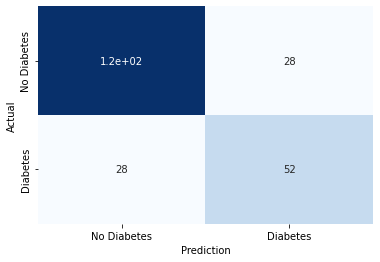



 Classification Report: Accuracy, Precision, Recall, and F1 Score:

              precision    recall  f1-score   support

       False       0.81      0.81      0.81       151
        True       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [78]:
##---------Type the code below this line------------------##
y_pred=network.predict(X_test)
y_pred =(y_pred>0.5)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

axis = sns.heatmap(conf_matrix, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
axis.set_xlabel('Prediction')
axis.set_ylabel('Actual')
plt.show()
print("\n\n Classification Report: Accuracy, Precision, Recall, and F1 Score:\n")
print(classification_report(y_pred,y_test))

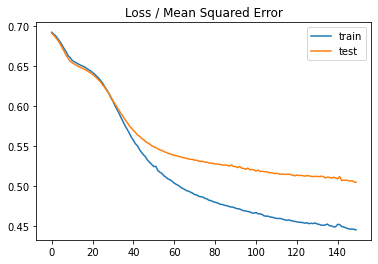

8/8 [==============================] - 0s 2ms/step
[[123  28]
 [ 28  52]]
8/8 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7576


[0.5046051740646362, 0.7575757503509521]

In [74]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Your input to confusion_matrix must be an array of int not one hot encodings.
y_pred = network.predict(X_test)
cf_matrix_k = confusion_matrix(y_test, (y_pred>0.5))
print(cf_matrix_k)

network.evaluate(X_test,y_test)

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

In this scenarion, we developed a model to predict whether a person is diabetic or not. We used a publicly available dataset from Kaggle - "Pima Indian Diabetes Database". The dataset incluses details of 768 persons. The proposed model performs analysis uisng artificial neural networks for predicting diabetes. There are 8 symptoms or attributes for occurence of diabetes. We received an accuracy of 78%. The accuracy of training set and test is both high. The means the model is right fit.

Learnings while working through the challenges:
We performed preprocessing of data to ensure accuracy. The data is already numeric however we ensure that all the data are converted to float. MinMaxNormaliztion is performed to normalize the data which is key for ANN. We didnot notice any coorelation of data using correlation analysis. The data of the target valiable is not fully balanced but it is adequate.
We tried to use feature engineering by converting the BMI and Insulin attributes into categorical but it did not provided any improvement in the accuracy
The mmost critical part is deciding the right combination of layers and neurons. We performed combination of several layers and neurons but the accuracy didnot improved beyond a certain level. We even tried adding few hyperparameters. Here we kept the layers and neurons at the minimum and simplest at which maximum accuracy is achieveed.

Provided more time is available, improvement is accuracy can be further improved.

##NOTE
All Late Submissions will incur a penalty of -2 marks. So submit your assignments on time.

Good Luck